<a href="https://colab.research.google.com/github/oopere/MachineLearningCourse/blob/main/exercises/HelloFlow1CatsvsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


let's start with TensorFlow.


---


In this collab, we are goig to solve three problems, and create thre different neuronal nets.


## First Sample. The most simple problem to solve 

---




In [ ]:
#First steep is import the libraries. 
import tensorflow as tf
#Numpy is a lybrary that allow us to work with arrays. 
import numpy as np
#keras is an open source neural networks lybrary writted in python that run's in varios frameworks, TensorFlow included. 
from tensorflow import keras
print (tf.__version__)


2.8.0


In [ ]:
#Model with just one dense layer, one neuron, and one input. This is the most simple model possible. 
model = tf.keras.Sequential(keras.layers.Dense(units=1, input_shape=[1]))


In [ ]:
#create 2 arrays, and the model must discover the relationship betwen the values. 
# (n * -1) + 2
X = np.array([-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype=float)
y = np.array([4.0, 3.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0], dtype=float)

In [ ]:
#compile and train the model.
#compile and indicate the optimezer and the model. By the moment we need to understand that this both functions are where the magic happens. 
#The optimizer is the function responsible to make a guess. 
#The loss function is responsible to indicate how accurated the guees is. 
#They try to be more accurated in each epoch
model.compile(optimizer="sgd", loss="mean_squared_error") 
model.fit(X, y, epochs=250)

Epoch 1/250
1/1 [==============================] - 0s 239ms/step - loss: 6.3385e-05
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 6.2090e-05
Epoch 3/250
1/1 [==============================] - 0s 6ms/step - loss: 6.0822e-05
Epoch 4/250
1/1 [==============================] - 0s 4ms/step - loss: 5.9580e-05
Epoch 5/250
1/1 [==============================] - 0s 5ms/step - loss: 5.8363e-05
Epoch 6/250
1/1 [==============================] - 0s 4ms/step - loss: 5.7171e-05
Epoch 7/250
1/1 [==============================] - 0s 5ms/step - loss: 5.6004e-05
Epoch 8/250
1/1 [==============================] - 0s 5ms/step - loss: 5.4860e-05
Epoch 9/250
1/1 [==============================] - 0s 5ms/step - loss: 5.3739e-05
Epoch 10/250
1/1 [==============================] - 0s 9ms/step - loss: 5.2642e-05
Epoch 11/250
1/1 [==============================] - 0s 5ms/step - loss: 5.1566e-05
Epoch 12/250
1/1 [==============================] - 0s 5ms/step - loss: 5.0514e-05
Epoch 13/25

In [ ]:
#expect something near -8. 
print(model.predict([10.0]))

[[-7.993168]]


# Working with Images
https://www.kaggle.com/datasets/muniryadi/cat-vs-rabbit?select=val-cat-rabbit

cats vs rabbits

In [ ]:
#First steep is import the libraries. 
import tensorflow as tf
#Numpy is a lybrary that allow us to work with arrays. 
import numpy as np
#keras is an open source neural networks lybrary writted in python that run's in varios frameworks, TensorFlow included. 
from tensorflow import keras
print (tf.__version__)


In [20]:
#obtain the data from martra.uadla.com

!wget --no-check-certificate \
https://martra.uadla.com/docs/validationCats.zip \-O /tmp/validationCats.zip

!wget --no-check-certificate \
https://martra.uadla.com/docs/validationDogs.zip \-O /tmp/validationDogs.zip


--2022-05-23 21:57:03--  https://martra.uadla.com/docs/validationCats.zip
Resolving martra.uadla.com (martra.uadla.com)... 162.144.22.118
Connecting to martra.uadla.com (martra.uadla.com)|162.144.22.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71717093 (68M) [application/zip]
Saving to: ‘/tmp/validationCats.zip’

/tmp/validationCats 100%[===================>]  68.39M  14.3MB/s    in 6.3s    

2022-05-23 21:57:11 (10.9 MB/s) - ‘/tmp/validationCats.zip’ saved [71717093/71717093]

--2022-05-23 21:57:11--  https://martra.uadla.com/docs/validationDogs.zip
Resolving martra.uadla.com (martra.uadla.com)... 162.144.22.118
Connecting to martra.uadla.com (martra.uadla.com)|162.144.22.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88854115 (85M) [application/zip]
Saving to: ‘/tmp/validationDogs.zip’

/tmp/validationDogs 100%[===================>]  84.74M  14.5MB/s    in 7.5s    

2022-05-23 21:57:19 (11.3 MB/s) - ‘/tmp/validationDogs.

In [21]:
#unzip the data
import zipfile
cvr_zip_file = '/tmp/validationCats.zip'
zipmem = zipfile.ZipFile(cvr_zip_file)
zipmem.extractall('/tmp/catsvsdogs/validation')

cvr_zip_file = '/tmp/validationDogs.zip'
zipmem = zipfile.ZipFile(cvr_zip_file)
zipmem.extractall('/tmp/catsvsdogs/validation')

zipmem.close()

In [ ]:
#create the model
#it's a minimal model for images, with just an Convolutionatl layer and a MaxPooling layer
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 128)               44859520  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 44,860,433
Trainable params: 44,860,433
Non-trainable params: 0
____________________________________________

In [ ]:
 #create the model
#a model with more convutionals and Pooling layers obtains leess parameters. 
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(32, (4,4), activation="relu", input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(64, (4,4), activation="relu", input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 297, 297, 16)      784       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 148, 148, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 145, 145, 32)      8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 72, 72, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 34, 34, 64)      

In [ ]:
#compile model 
from tensorflow.keras.optimizers import RMSprop
#binary_crossentropy is a loss function that works really weel with binary clasifications. 
model.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])
model2.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [ ]:
#preparing the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#TRAIN Dataset
#Normalize the images
train_idg = ImageDataGenerator(rescale=1/255)
train_data = train_idg.flow_from_directory(
    '/tmp/catsvsrabbits/cats_vs_Rabbits/train-cat-rabbit', 
    target_size = (300, 300), 
    batch_size = 16, 
    class_mode='binary'
)
#VALIDATION Dataset
val_idg = ImageDataGenerator(rescale=1/255)
val_data = val_idg.flow_from_directory(
    '/tmp/catsvsrabbits/cats_vs_Rabbits/val-cat-rabbit', 
    target_size = (300, 300), 
    batch_size = 16, 
    class_mode='binary'
)

Found 1600 images belonging to 2 classes.
Found 414 images belonging to 2 classes.


In [ ]:
#Trianing the model
history = model.fit(
     train_data,
     validation_data = val_data, 
     epochs=30,
     steps_per_epoch=8,
     validation_steps=8,
     verbose=1)

Epoch 1/30
8/8 [==============================] - 1s 135ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 2.7680 - val_accuracy: 0.7500
Epoch 2/30
8/8 [==============================] - 1s 125ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.3515 - val_accuracy: 0.8125
Epoch 3/30
8/8 [==============================] - 1s 128ms/step - loss: 0.7833 - accuracy: 0.8672 - val_loss: 1.1534 - val_accuracy: 0.7344
Epoch 4/30
8/8 [==============================] - 1s 127ms/step - loss: 0.1464 - accuracy: 0.9453 - val_loss: 1.0568 - val_accuracy: 0.7344
Epoch 5/30
8/8 [==============================] - 1s 137ms/step - loss: 0.4735 - accuracy: 0.9141 - val_loss: 0.8784 - val_accuracy: 0.8438
Epoch 6/30
8/8 [==============================] - 1s 125ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 1.7194 - val_accuracy: 0.7578
Epoch 7/30
8/8 [==============================] - 1s 124ms/step - loss: 0.0280 - accuracy: 0.9922 - val_loss: 0.6209 - val_accuracy: 0.8047
Epoch 8/30
8/8 [====

In [ ]:
#Trianing the model2
history2 = model2.fit(
     train_data,
     validation_data = val_data, 
     epochs=30,
     steps_per_epoch=8,
     validation_steps=8,
     verbose=1)

Epoch 1/30
8/8 [==============================] - 1s 137ms/step - loss: 0.1478 - accuracy: 0.9375 - val_loss: 1.0007 - val_accuracy: 0.8203
Epoch 2/30
8/8 [==============================] - 1s 129ms/step - loss: 0.1215 - accuracy: 0.9531 - val_loss: 0.7870 - val_accuracy: 0.7344
Epoch 3/30
8/8 [==============================] - 1s 128ms/step - loss: 0.4517 - accuracy: 0.8594 - val_loss: 0.7304 - val_accuracy: 0.7344
Epoch 4/30
8/8 [==============================] - 1s 131ms/step - loss: 0.2288 - accuracy: 0.9062 - val_loss: 0.7409 - val_accuracy: 0.7578
Epoch 5/30
8/8 [==============================] - 1s 126ms/step - loss: 0.1851 - accuracy: 0.9375 - val_loss: 0.7299 - val_accuracy: 0.7812
Epoch 6/30
8/8 [==============================] - 1s 130ms/step - loss: 0.2364 - accuracy: 0.9141 - val_loss: 1.0637 - val_accuracy: 0.7812
Epoch 7/30
8/8 [==============================] - 1s 128ms/step - loss: 0.1232 - accuracy: 0.9688 - val_loss: 0.7738 - val_accuracy: 0.7656
Epoch 8/30
8/8 [====

<Figure size 432x288 with 0 Axes>

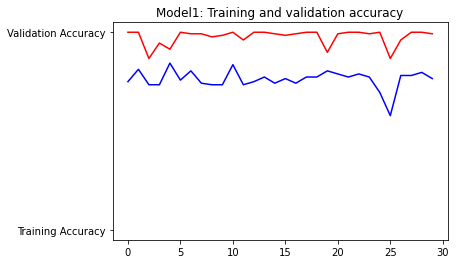

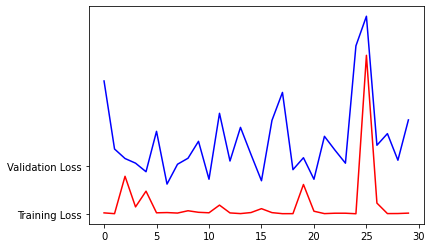

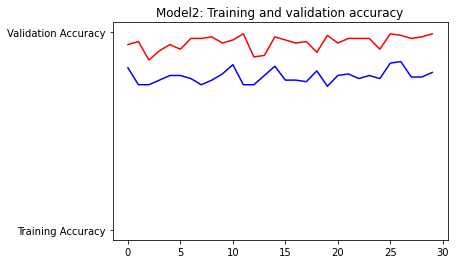

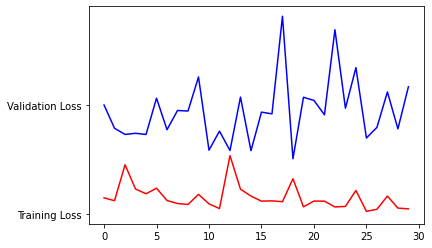

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
 
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

acc2=history2.history['accuracy']
val_acc2=history2.history['val_accuracy']
loss2=history2.history['loss']
val_loss2=history2.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Model1: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

plt.plot(epochs, acc2, 'r', "Training Accuracy")
plt.plot(epochs, val_acc2, 'b', "Validation Accuracy")
plt.title('Model2: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss2, 'r', "Training Loss")
plt.plot(epochs, val_loss2, 'b', "Validation Loss")
plt.figure()

